## Прихотливая индексация

Суть прихотливой индексации - передача массива индексов с целью одновременного доступа к нескольким элементам массива.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
rand = np.random.RandomState(42)
x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [2]:
[x[3], x[7], x[2]] # обращение к трем различным элементам массива

[71, 86, 14]

In [3]:
# Можно подготовить единый список индексов и получить тот же результат
ind = [3, 7, 2]
x[ind]

array([71, 86, 14])

В случае прихотливой индексации форма результата отражает форму массивов индексов (index arrays), а не форму индексируемого массива:


In [4]:
ind = np.array([[3, 7],
               [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

Прихотливая индексация работает в случае многомерных массивов.

In [5]:
x = np.arange(12).reshape((3, 4))
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

Аналогично обычной индексации первый индекс относится к строкам, а второй к столбцам:

In [6]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
x[row, col]

array([ 2,  5, 11])

In [7]:
x[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [8]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

##### При работе с "прихотливой" индексацией важно никогда не забывать, что возвращаемое значение отражает транслируемую форму индексов, а не форму индексируемого массива

## Комбинированная индексация

In [9]:
print(x)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [10]:
# можно применять совместно "прихотливые" и простые индексы:
x[2, [2, 0, 1]]

array([10,  8,  9])

In [11]:
# можно использовать "прихотливые" индексы и срезы:
x[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [12]:
# можно применять совместно "прихотливую" индексацию и маскирование:
mask = np.array([1, 0, 1, 0], dtype=bool)
x[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [13]:
row

array([0, 1, 2])

## Пример: выборка случайных точек

In [14]:
mean = [0, 0]
cov = [[1, 2], [2, 5]]
x = rand.multivariate_normal(mean, cov, 100)
x.shape

(100, 2)

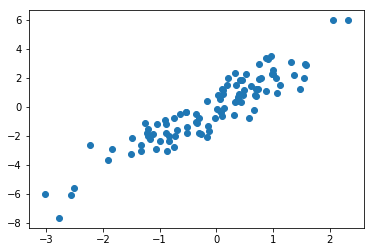

In [15]:
plt.scatter(x[:, 0], x[:, 1], label='Нормально распределенные точки');

Воспользуемся "прихотливой" индексацией для выборки 20 случайных точек.

In [16]:
indices = np.random.choice(x.shape[0], 20, replace=False)
indices

array([67, 11, 30, 32, 22, 55, 74, 83, 76, 23, 75, 93,  0, 28, 33, 16, 21,
       99, 59,  6])

In [17]:
selection = x[indices] # тут используется "прихотливая" индексация
selection.shape

(20, 2)

Чтобы посмотреть, какие точки были выбраны, нарисуем поверх первой диаграммы большие круги в местах расположения выбранных точек

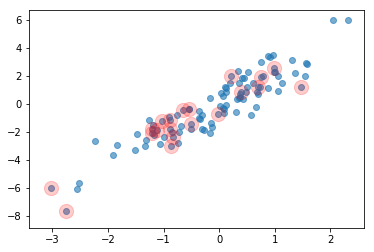

In [18]:
plt.scatter(x[:, 0], x[:, 1], alpha=0.6)
plt.scatter(selection[:, 0], selection[:, 1], c='r', s=200, alpha=0.2);

In [19]:
selection[:, 1]

array([-1.40960773, -0.74987887, -2.04402725, -7.66760648, -1.15767204,
        1.21504303, -3.03568353,  1.95834451, -0.37039911, -1.87508012,
       -1.18469125, -2.38632016, -0.46220608, -1.81495444,  0.87949228,
       -6.00766046,  2.54294059, -1.77693724,  2.00781492,  1.22961093])

## Изменение значений с помощью прихотливой индексации

In [20]:
# Допустим есть массив индексов и нам нужно присвоить соответствующим элементам массива какие-то значение:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [21]:
# можно использовать любой оператор присваивания:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [22]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [23]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

Метод at() применяет соответствующий операторк к элементам с заданными индексами (в данном случае i) с использованием заданного заначения (в данном случае 1):

In [24]:
x = np.zeros(10)
np.add.at(x, i, 1) # добавляет 1 к каждому индексу в i
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


## Пример: разбиение данных на интервалы 

In [32]:
np.random.seed(42)
x = np.random.randn(100)
x

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
       -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
       -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
        1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
        0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
       -0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
       -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
        0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
       -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016,
        0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
        0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513,
       -0.47917424, -0.18565898, -1.10633497, -1.19620662,  0.81252582,
        1.35624003, -0.07201012,  1.0035329 ,  0.36163603, -0.64

In [37]:
# расчитываем гистограмму вручную
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)
bins

array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
       -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
        0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
        2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ])

In [36]:
# ищем подходящий интервал для каждого x
i = np.searchsorted(bins, x)
i

array([11, 10, 11, 13, 10, 10, 13, 11,  9, 11,  9,  9, 10,  6,  7,  9,  8,
       11,  8,  7, 13, 10, 10,  7,  9, 10,  8, 11,  9,  9,  9, 14, 10,  8,
       12,  8, 10,  6,  7, 10, 11, 10, 10,  9,  7,  9,  9, 12, 11,  7, 11,
        9,  9, 11, 12, 12,  8,  9, 11, 12,  9, 10,  8,  8, 12, 13, 10, 12,
       11,  9, 11, 13, 10, 13,  5, 12, 10,  9, 10,  6, 10, 11, 13,  9,  8,
        9, 12, 11,  9, 11, 10, 12,  9,  9,  9,  7, 11, 10, 10, 10])

In [38]:
# добавляем 1 к каждому из интервалов
np.add.at(counts, i, 1)

Полученные числа отражают количество точек в каждом из интервалов, другими словами, гистограмму.

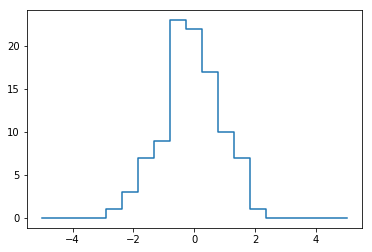

In [42]:
plt.plot(bins, counts, linestyle='steps');

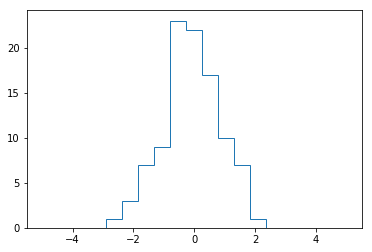

In [45]:
plt.hist(x, bins, histtype='step'); # автоматическое построение гистограммы

In [46]:
bins

array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
       -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
        0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
        2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ])

In [47]:
x

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
       -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
       -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
        1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
        0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
       -0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
       -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
        0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
       -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016,
        0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
        0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513,
       -0.47917424, -0.18565898, -1.10633497, -1.19620662,  0.81252582,
        1.35624003, -0.07201012,  1.0035329 ,  0.36163603, -0.64

In [49]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)
print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
25.5 µs ± 4.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custom routine:
16.3 µs ± 383 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
